# Music Genre Classification

**Aidan O'Keefe**

PICTURE OF AUDIO FILE SPECTROGRAM GOES HERE

<br>

## Overview

OVERVIEW HERE


## Business Understanding

Business Case 1: An app for music recognition does not just want to find the song of that you are hearing (like Shazam and SoundHound do) but also wants to find the genre so it can then better inform its recommendations. 

Business Case 2: A Folk Music researcher (musicologist) is recording cultural music in the field and wants to know what genre to categorize his recordings. He think that maybe by finding what modern genre a recording is classified as will help explain which modern genres are influenced by traditional folk music. (Jazz being influenced by African rhythms and Bluegrass from traditional Irish music). In order to help the musicologist, I am extracting data from audio files and building a model which can classify a recording into a genre based on the data in its audio file.

## Data Understanding

I chose to use ["GTZAN Dataset - Music Genre Classification" from Kaggle](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification) which is a dataset of 1000 audio tracks of a 30-second duration. The 1000 rows of data are evenly divided into 10 genres with 100 tracks each. All the original audio files are in 22050Hz Mono 16-bit files in .wav format.

In "features_30_sec.csv" which I am using, each row represents a 30-second long song recording. The columns contain a mean and variance computed over multiple features that can be extracted from an audio file using the Librosa python package.


#### Decription of each column feature:

`filename`: the name of each audio .wav file from where the rest of the data was extracted.

`length`: length of each recording minus silence at beginning or end of the audio track.

`chroma_stft_mean`: Mean of computed chromagrams from a waveform or power spectrogram.

`chroma_stft_var`: Variance of computed chromagrams from a waveform or power spectrogram.

`rms_mean`: Mean of the computed root-mean-square (RMS) value for each frame from the audio samples.

`rms_var`: Variance of the computed root-mean-square (RMS) value for each frame from the audio samples.

`spectral_centroid_mean`: Computed the spectral centroid (i.e. where a sound's ”center of mass” is located). Calculated as the weighted mean of the sound's frequencies.

`spectral_centroid_variance`: Variance of the computed the spectral centroid (i.e. where a sound's ”center of mass” is located).

`spectral_bandwidth_mean`: Mean of the computed p'th-order spectral bandwidth.

`spectral_bandwidth_var`: Variance of the computed p'th-order spectral bandwidth.

`rolloff_mean`: Mean of the computed roll-off frequency aka spectral_rolloff

`rolloff_variance`: Variance of the computed roll-off frequency aka spectral_rolloff

`zero_crossing_rate_mean`: Mean of the computed the zero-crossing rate of an audio time series.

`zero_crossing_rate_variance`: Variance of the computed the zero-crossing rate of an audio time series.

`harmony_mean`: Mean of the extracted the harmonic components.

`harmony_var`: Variance of the extracted the harmonic components.

`perceptr_mean`: Mean of the extracted the percussive components.

`perceptr_var`: Variance of the extracted the percussive components.

`tempo`: Estimated tempo (beats per minute).

`mfccN_mean`: Mean of the calculated Mel-frequency cepstral coefficients (MFCCs) for frame N of the audio file.

`mfccN_var`: Variance of the calculated MFCCs for frame N of the audio file.

`label`: The assigned genre label for each audio file that will be used as our target variable. Options are metal, reggae, rock, disco, jazz, classical, hiphop, country, blues, and pop.

### Importing The Data

In [1]:
#Import standard libraries
import numpy as np
import pandas as pd

#View all columns in our dataframes
pd.options.display.max_columns = None
pd.options.display.width = None

#Import Librosa for audio to text creation
# import librosa

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
#Load the data csv
music_df = \
pd.read_csv("/Users/Aidan/Documents/Flatiron/Phase_3/Phase_3_project/Music_Genre_Classification/data/features_30_sec.csv") 

In [3]:
#Preview the first five records
music_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Exploring The Data

In [4]:
#Look at our datatypes and for any missing values
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [5]:
#Check our dataframe for duplicates
music_df.duplicated().sum()

0

It looks like we have no missing values and all of our features are numerical except for file name and label. We also do not have any duplicates.

In [6]:
#Let's see a summary of numerical values for our data
music_df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,0.103612,0.002986,-3.659332e-04,0.012540,-0.000395,5.670073e-03,119.505363,-144.472987,3747.875414,99.554278,706.899539,-8.920291,468.286436,36.292447,220.447219,-1.144840,174.404462,14.633491,127.232071,-5.129038,116.367019,10.119172,88.198988,-6.994062,88.566933,7.729785,81.733490,-6.021069,75.551228,4.471693,68.670817,-4.795884,67.871712,1.781900,64.764096,-3.869308,62.873761,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,0.041821,0.003024,1.683946e-03,0.011653,0.001082,6.500325e-03,28.264176,100.229406,2770.558394,31.330873,439.120256,21.690676,287.143462,16.664665,116.236941,12.221340,100.767823,11.839591,68.475115,9.940460,58.400048,10.463270,41.048213,8.283921,39.494072,7.937309,36.733649,6.817013,38.135183,6.715787,32.625534,6.170181,33.154276,5.008385,34.450290,4.873599,33.904101,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,0.021697,0.000044,-2.606458e-02,0.000049,-0.007150,8.299008e-07,54.978391,-552.120056,174.571365,-1.461542,93.104752,-89.870193,35.467754,-18.727547,34.263149,-38.890347,29.912008,-28.415911,20.847921,-32.930431,29.027332,-24.915823,22.464230,-31.640574,25.825863,-12.050177,19.273201,-28.057501,21.402756,-15.796446,18.642517,-27.523129,17.293922,-12.594489,14.250607,-17.539125,9.769691,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,0.070244,0.001079,-1.041584e-04,0.004383,-0.000537,1.292592e-03,99.384014,-200.763893,1844.488129,76.779915,398.020767,-24.219811,270.466576,24.108212,129.397377,-9.979157,101.266209,5.098573,76.505194,-12.870810,73.546917,1.609181,57.349041,-13.246939,59.882313,1.620753,55.734016,-10.964135,51.242420,-0.547371,46.854038,-9.357906,46.294396,-1.639417,43.416593,-7.165884,42.236251,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,0.099503,0

Our data seems to have varying magnitude across rows which indicates that we will need to scale it before modeling.
<br>
<br>
We could be seeing some outliers in our data. In `mfcc2_var` our 75% is 884.040359 but our maximum is 4025.973389. That's a large jump.

In [7]:
#Let's look at our `label` column which will be our target varible
music_df.label.value_counts()

metal        100
classical    100
pop          100
jazz         100
blues        100
disco        100
reggae       100
country      100
rock         100
hiphop       100
Name: label, dtype: int64

### Visualizing the Data

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

%matplotlib inline

In [9]:
music_df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [10]:
#View Distribution of variables

In [11]:
#Separate the columns with means from rest of dataframe

mean_cols = []

for column in music_df.columns:
    if "mean" in column:
        mean_cols.append(column)

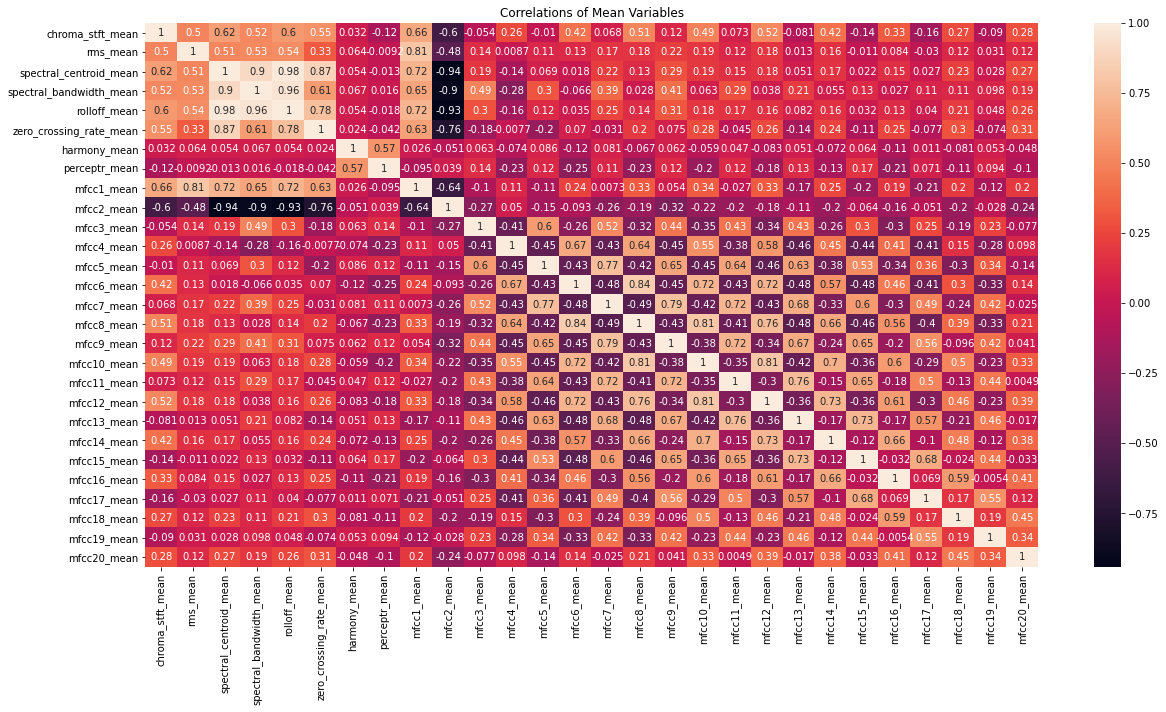

In [12]:
#Let's take a look at the correlation between our Means

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Correlations of Mean Variables")

sns.heatmap(music_df[mean_cols].corr(), annot=True);

From the above heatmap, we can see that `mfcc2_mean` has strong negative correlations with multiple other variables (`spectral_centroid_mean`, `spectral_bandwidth_mean`, `rolloff_mean`). These three variables all have strong positive correlations with each other as well.

I would recommend dropping the columns `mfcc2_mean`, `spectral_centroid_mean`, and `rolloff_mean` in order to remove correlation close that is at or over 0.9 or -0.9.

In [13]:
#Separate the columns with variance from rest of dataframe

var_cols = []

for column in music_df.columns:
    if "var" in column:
        var_cols.append(column)

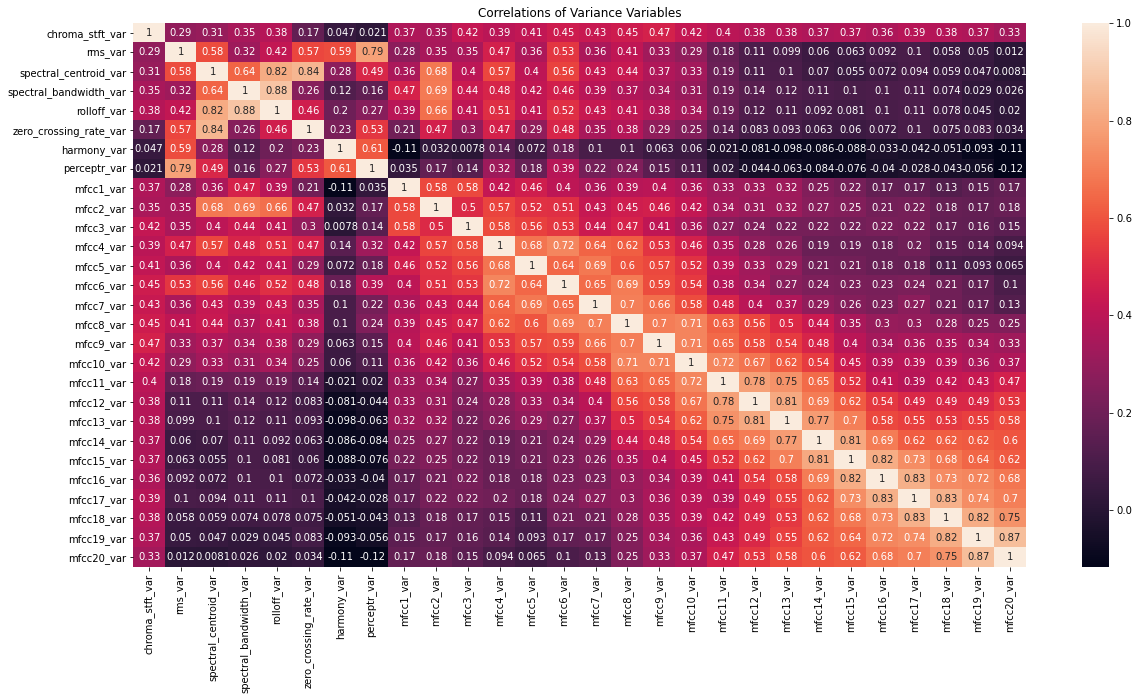

In [14]:
#Let's take a look at the correlation between our Variances

fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Correlations of Variance Variables")

sns.heatmap(music_df[var_cols].corr(), annot=True);

Our variance variables seem to be much more independent than the mean varibles with no values at or above 0.9 and -0.9.

## Data Preparation

In [15]:
#LabelEncoder to turn our target classes into numbers
from sklearn.preprocessing import LabelEncoder

#Instantiate our LabelEncoder
lab_enc = LabelEncoder()

#Fit and Transform our target variable and replace the 'label' column in the dataset
music_df['label'] = lab_enc.fit_transform(music_df['label'])

#Check the 'label' column is now encoded
music_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0


In [57]:
#Define our predictive variables and target variable
X = music_df.drop(['label','filename', 'mfcc2_mean', 'spectral_centroid_mean','rolloff_mean', 'length'], axis=1)
y = music_df['label']

Dropped both non-numeric columns from our X as `label` is our target variable and `filename` is just an id and not intrinsic to the data.

In [58]:
#Split the data to prevent data leakage using a 80/20 train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X, 
                                                     y, 
                                                     stratify = y, 
                                                     test_size = 0.2, 
                                                     random_state= 42))

In [59]:
# Let's look to see if our target classes are balanced and our stratify worked
y_train.value_counts()

9    80
8    80
7    80
6    80
5    80
4    80
3    80
2    80
1    80
0    80
Name: label, dtype: int64

In [61]:
# #Import variance inflation factor to deal with multi-collinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif["features"] = X_train.columns
# vif.sort_values('VIF Factor', ascending=False)

**To interpret the VIF Factor:**
    
1 = not correlated.

Between 1 and 5 = moderately correlated.

Greater than 5 = highly correlated.

## Modeling

If we know that our data contains 10 genres of 100 samples each, then it reasons that our **model-less baseline** accuracy would be 10%; meaning that if we predicted that every song sample was 1 genre, we would be right 10% of the time. That's a pretty low baseline so I'm confident our model will perform better.

In [20]:
#Classification algorithm
from sklearn.linear_model import LogisticRegression

#Pipeline 
from sklearn.pipeline import Pipeline

#Scalers
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Normalizer

### Baseline Model

For our first model, we are going to use a simple StandardScaler and a Logisitc Regression model. We changed the solver to "liblinear" (which works well for smaller datasets) as we had a converge error with the default "lbfgs" solver.

In [21]:
#Create variable storing our scaler and model
steps = [('stdscale', StandardScaler()), ('LR', LogisticRegression(solver= "liblinear", random_state= 42))]

#Instantiate the Modeling Pipeline
model = Pipeline(steps)

#Fit to our training data
model.fit(X_train, y_train)

Pipeline(steps=[('stdscale', StandardScaler()),
                ('LR',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [22]:
# Let's see our baseline train and test scores
print('Train baseline:', model.score(X_train, y_train))

print('Test baseline:', model.score(X_test, y_test))

Train baseline: 0.85125
Test baseline: 0.725


It looks like our model is overfit to our training data. This could be caused by high variance and complexity in our data. 

### Second Model

Now let's perform a Logistic Regression and try to tune our hyper-parameters.

In [23]:
#Crossvalidation packages
from sklearn.model_selection import  GridSearchCV, cross_val_score, RandomizedSearchCV

In [24]:
#Create variable storing our scaler and model
steps = [('stdscale', StandardScaler()), ('LR', LogisticRegression(solver= "liblinear",
                                                                   max_iter=1500,
                                                                   random_state= 42))]

# Create list of hyperparameters to try
params = {'LR__penalty': ['l1', 'l2'],
         'LR__C': [.01, .1, 1.0, 10, 100, 1000],
         'LR__tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}



#Instantiate the Modeling Pipeline
model = Pipeline(steps)

# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = model, 
                             param_distributions = params,
                             cv = 5, 
                             n_jobs= -1, 
                             random_state=42)

rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('stdscale', StandardScaler()),
                                             ('LR',
                                              LogisticRegression(max_iter=1500,
                                                                 random_state=42,
                                                                 solver='liblinear'))]),
                   n_jobs=-1,
                   param_distributions={'LR__C': [0.01, 0.1, 1.0, 10, 100,
                                                  1000],
                                        'LR__penalty': ['l1', 'l2'],
                                        'LR__tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                    0.01, 0.1, 1]},
                   random_state=10)

In [25]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.7049999999999998

In [26]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'LR__tol': 0.01, 'LR__penalty': 'l1', 'LR__C': 1.0}

In [27]:
#Save best estimator as our new model
best_cv_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_cv_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 2nd Model:', best_cv_model.score(X_train, y_train))
print('Test 2nd Model:', best_cv_model.score(X_test, y_test))

Train 2nd Model: 0.84875
Test 2nd Model: 0.725


Looks like we brought down our overfitting a little bit but not enough and we scored the exact same on our test data.

### Third Model

Now let's try another algorithm, K-Nearest Neighbor.

In [45]:
#Import K-Nearest Neighbor Classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#Create variable storing our scaler and model
steps = [('stdscale', StandardScaler()), ('KNN', KNeighborsClassifier())]

# Create list of hyperparameters to try
params = {'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13],
         'KNN__p': [1, 2, 3, 4, 5]}


#Instantiate the Modeling Pipeline
model = Pipeline(steps)

# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = model, 
                             param_distributions = params,
                             cv = 5, 
                             n_jobs= -1, 
                             random_state=42)

rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('stdscale', StandardScaler()),
                                             ('KNN', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'KNN__n_neighbors': [1, 3, 5, 7, 9, 11,
                                                             13],
                                        'KNN__p': [1, 2, 3, 4, 5]},
                   random_state=10)

In [47]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.665

In [49]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'KNN__p': 1, 'KNN__n_neighbors': 3}

In [50]:
#Save best estimator as our new model
best_cv_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_cv_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 3rd Model:', best_cv_model.score(X_train, y_train))
print('Test 3rd Model:', best_cv_model.score(X_test, y_test))

Train 3rd Model: 0.8625
Test 3rd Model: 0.675


It looks like our simple Logistic Regression model did better on the test. 

### Fourth Model

Now let's try another algorithm, Decision Trees.

In [31]:
#Import the Decision Treets Classification algorithm
from sklearn.tree import DecisionTreeClassifier

In [51]:
#Create variable storing our scaler and model
steps = [('stdscaler', StandardScaler()), ('DT', DecisionTreeClassifier())]

# Create list of hyperparameters to try
params = {'DT__criterion': ['gini', 'entropy'],
         'DT__min_samples_split': np.arange(1,10,1),
          'DT__min_samples_leaf': np.arange(1,5,1)}



#Instantiate the Modeling Pipeline
model = Pipeline(steps)

# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = model, 
                             param_distributions = params,
                             cv = 5, 
                             n_jobs= -1, 
                             random_state=42)

rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('stdscale', StandardScaler()),
                                             ('DT', DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'DT__criterion': ['gini', 'entropy'],
                                        'DT__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'DT__min_samples_split': [1, 2, 3, 4, 5,
                                                                  6, 7, 8, 9,
                                                                  10]},
                   random_state=10)

In [53]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.5925

In [54]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'DT__min_samples_split': 9,
 'DT__min_samples_leaf': 2,
 'DT__criterion': 'entropy'}

In [55]:
#Save best estimator as our new model
best_cv_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_cv_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 4th Model:', best_cv_model.score(X_train, y_train))
print('Test 4th Model:', best_cv_model.score(X_test, y_test))

Train 4th Model: 0.9025
Test 4th Model: 0.57


### Fifth Model

Let's try to use multiple decision trees with a Bagging Classifier.

In [65]:
from sklearn.ensemble import BaggingClassifier

In [70]:
#Create Bagging Classifier with 150 Decision Trees
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=42)
                                       , n_estimators = 150)

#Instantiate model
bag_pipe = Pipeline([('stdscaler', StandardScaler()),
                     ('model', bag_class_decision)])

#Create list of hyperparameters to try
params = {'model__base_estimator__criterion': ['gini', 'entropy'],
          'model__base_estimator__min_samples_split': np.arange(1,10,1),
          'model__base_estimator__min_samples_leaf': np.arange(1,5,1),
          'model__base_estimator__max_depth': np.arange(4,28,2)}


# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = bag_pipe, 
                             param_distributions = params,
                             cv = 5, 
                             n_jobs= -1, 
                             random_state=42)


rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('stdscaler', StandardScaler()),
                                             ('model',
                                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                                n_estimators=150))]),
                   n_jobs=-1,
                   param_distributions={'model__base_estimator__criterion': ['gini',
                                                                             'entropy'],
                                        'model__base_estimator__max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26]),
                                        'model__base_estimator__min_samples_leaf': array([1, 2, 3, 4]),
                                        'model__base_estimator__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42)

In [71]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.6925

In [72]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'model__base_estimator__min_samples_split': 2,
 'model__base_estimator__min_samples_leaf': 2,
 'model__base_estimator__max_depth': 20,
 'model__base_estimator__criterion': 'gini'}

In [73]:
#Save best estimator as our new model
best_cv_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_cv_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 5th Model:', best_cv_model.score(X_train, y_train))
print('Test 5th Model:', best_cv_model.score(X_test, y_test))

Train 5th Model: 0.99875
Test 5th Model: 0.705


### Sixth Model

Let's try to use multiple decision trees again but with a Random Forest and use feature importance to determine which features to keep.

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
#Instantiate model with Random Forest Classifier with 150 Decision Trees
rf_pipe = Pipeline([('stdscaler', StandardScaler()),
                    ('model', RandomForestClassifier(random_state=42))])

#Create list of hyperparameters to try
params = {'model__criterion': ['gini', 'entropy'],
          'model__n_estimators': [50, 100, 150,200, 250],
          'model__min_samples_split': np.arange(1,10,1),
          'model__min_samples_leaf': np.arange(1,5,1),
          'model__max_depth': np.arange(4,28,2)}


# 5 Fold Randomized Cross Validations
rand_cv = RandomizedSearchCV(estimator = rf_pipe, 
                             param_distributions = params,
                             cv = 5, 
                             n_jobs= -1, 
                             random_state=42)


rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('stdscaler', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26]),
                                        'model__min_samples_leaf': array([1, 2, 3, 4]),
                                        'model__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'model__n_estimators': [50, 100, 150,
                                                                200, 250]},
                   random_state=42)

In [78]:
#Let's look at the best score from our Randomized Search CrossValidation (cv)
rand_cv.best_score_

0.70125

In [79]:
#Let's look at the best parameters from our Randomized Search CrossValidation (cv)
rand_cv.best_params_

{'model__n_estimators': 250,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 1,
 'model__max_depth': 18,
 'model__criterion': 'entropy'}

In [81]:
#Save best estimator as our new model
best_rf_model = rand_cv.best_estimator_

#Fit our train data on our best cv model
best_rf_model.fit(X_train, y_train)

# Let's see our best scores
print('Train 6th Model:', best_rf_model.score(X_train, y_train))
print('Test 6th Model:', best_rf_model.score(X_test, y_test))

Train 6th Model: 0.99875
Test 6th Model: 0.7


Not that great a score but let's look at Feature Importances to know which predictive variables are best to use.

In [82]:
feat_imp = best_rf_model['model'].feature_importances_

feat_imp_series = pd.Series(feat_imp, 
          index = X.columns).sort_values(ascending = False)

In [93]:
#View our series of ranked predictive variables
feat_imp_series

chroma_stft_mean           0.064637
perceptr_var               0.056044
spectral_centroid_var      0.040877
spectral_bandwidth_mean    0.038942
mfcc1_mean                 0.038210
mfcc4_mean                 0.034341
mfcc5_var                  0.031291
rms_var                    0.031101
rms_mean                   0.027910
rolloff_var                0.026531
mfcc9_mean                 0.025321
mfcc6_mean                 0.024396
chroma_stft_var            0.024244
harmony_var                0.023692
zero_crossing_rate_var     0.023205
mfcc8_mean                 0.021906
mfcc4_var                  0.021027
mfcc12_mean                0.020699
zero_crossing_rate_mean    0.020067
mfcc17_mean                0.019152
mfcc7_var                  0.018860
mfcc6_var                  0.018365
mfcc13_mean                0.016072
mfcc20_var                 0.015894
mfcc3_var                  0.015593
mfcc8_var                  0.015563
mfcc10_var                 0.015403
mfcc7_mean                 0

Let's only use the top 15 Features going forward.

In [88]:
#Assign top 15 predictive features to a new variable
feat_imp_cols = feat_imp_series.index[0:15]

In [91]:
#Define new X variables using Feature Importances columns
X_train = X_train[feat_imp_cols]
X_test = X_test[feat_imp_cols]

### Seventh Model

Let's use only the features deemed important from our Random Forest and now try XGBoost.

,chroma_stft_mean,perceptr_var,spectral_centroid_var,spectral_bandwidth_mean,mfcc1_mean,mfcc4_mean,mfcc5_var,rms_var,rms_mean,rolloff_var,mfcc9_mean,mfcc6_mean,chroma_stft_var,harmony_var,zero_crossing_rate_var
575,0.293696,0.001968,3.356676e+05,2854.682005,-78.167473,21.018932,76.854942,0.004145,0.146971,2.076088e+06,-6.074429,-3.600541,0.086162,0.019112,0.001976
204,0.382781,0.004010,1.928971e+05,2848.106749,-20.747871,30.770088,62.178528,0.000802,0.209498,1.179867e+06,3.435817,6.502923,0.081821,0.032493,0.001263
964,0.374337,0.002871,1.556215e+05,2181.018680,-118.770134,42.110744,155.398590,0.001652,0.107106,9.812774e+05,-24.334909,29.067654,0.084743,0.006413,0.001472
503,0.319254,0.000308,9.294625e+04,1058.892383,-297.319611,-1.628381,146.559738,0.001298,0.059467,4.377534e+05,-5.383337,9.986559,0.081004,0.003672,0.000209
502,0.267729,0.000412,1.610841e+05,1050.323423,-256.959015,25.650612,234.879639,0.000992,0.080847,4.885927e+05,-4.095359,-0.222764,0.083935,0.006332,0.000927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.343731,0.002881,1.047299e+06,2098.904013,-174.912491,41.620026,308.156372,0.003097,0.082305,2.909269e+06,-9.689802,9.088252,0.092373,0.004551,0.006501
346,0.376341,0.007156,2.786049e+05,2273.051334,-125.681534,33.672756,154.527405,0.003015,0.113059,1.490231e+06,-14.054307,23.703136,0.093383,0.004072,0.002289
930,0.390347,0.001865,7.240556e+05,2831.211163,-131.391006,34.589581,127.678192,0.000500,0.096537,1.186516e+06,-7.052406,21.885111,0.085140,0.005602,0.003678
306,0.473975,0.010423,1.486655e+05,2490.612887,-14.543533,31.507599,139.485092,0.002105,0.191986,8.313700e+05,-3.795433,11.862863,0.077535,0.016932,0.001340


### Eigth Model

Let's see about stacking multiple algorithms together.

### Final Model

In [34]:
# #Preprocessing Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer

#Create preprocessing pipeline for X variables
# preprocess_pipe = Pipeline([('stdscale', StandardScaler())])

In [35]:
#List the estimators we want to use
# estimators= [('LR', LogisticRegression(random_state= 10))]

#Create variable storing preprocessing pipeline and our estimators
# steps = [('stdscale', StandardScaler()), ('LR', LogisticRegression(solver= "liblinear", random_state= 10))]

#Create list of hyperparameters to try
# params = {'estimators__LR__penalty': ['l1', 'l2'],
#          'estimators__LR__solver': ['liblinear', 'saga'],
#          'estimators__LR__C': [.1, 1.0, 10, 100, 1000]}

#Instantiate the Modeling Pipeline
# model = Pipeline(steps)

#5 Fold Randomized Cross Validations
# rand_cv = RandomizedSearchCV(estimator = model, param_distributions = params,\
#                              cv = 5, random_state=42)

# rand_cv.fit(X_train, y_train)

In [36]:
# Let's see our best score
# rand_cv.best_score_

In [37]:
# #Let's view our top 5 results as a dataframe
# rand_cv_results = pd.DataFrame(rand_cv.cv_results_)
# rand_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LR__tol,param_LR__penalty,param_LR__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024334,0.001424,0.005969,0.002075,0.001,l1,0.01,"{'LR__tol': 0.001, 'LR__penalty': 'l1', 'LR__C...",0.21250,0.19375,0.21250,0.21250,0.19375,0.20500,0.009186,10
1,0.034798,0.005025,0.006227,0.002240,0.1,l1,0.1,"{'LR__tol': 0.1, 'LR__penalty': 'l1', 'LR__C':...",0.62500,0.57500,0.61250,0.66250,0.56250,0.60750,0.035882,9
2,0.123178,0.004917,0.004518,0.000376,0.01,l1,1,"{'LR__tol': 0.01, 'LR__penalty': 'l1', 'LR__C'...",0.70625,0.69375,0.73125,0.76875,0.62500,0.70500,0.047500,1
3,0.051500,0.003009,0.004829,0.000701,1,l2,1,"{'LR__tol': 1, 'LR__penalty': 'l2', 'LR__C': 1.0}",0.66875,0.65625,0.68125,0.73750,0.60625,0.67000,0.042279,8
4,0.408084,0.023712,0.005350,0.002148,0.01,l1,10,"{'LR__tol': 0.01, 'LR__penalty': 'l1', 'LR__C'...",0.70625,0.65000,0.72500,0.71250,0.58750,0.67625,0.051296,6


In [38]:
# #Save our model with the best parameters
# best_cv_model = rand_cv.best_estimator_

In [39]:
# #Fit our train data on our best cv model
# best_cv_model.fit(X_train, y_train)

Pipeline(steps=[('stdscale', StandardScaler()),
                ('LR',
                 LogisticRegression(max_iter=1500, penalty='l1',
                                    random_state=42, solver='liblinear',
                                    tol=0.01))])

In [40]:
# #Predict on our Test data
# y_pred = best_cv_model.predict(X_test)

## Evaluation

In [63]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,\
classification_report, plot_confusion_matrix

In [42]:
#Final model evaluation 

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.90      0.95      0.93        20
           2       0.74      0.70      0.72        20
           3       0.69      0.55      0.61        20
           4       0.72      0.65      0.68        20
           5       0.68      0.85      0.76        20
           6       0.79      0.75      0.77        20
           7       0.80      0.80      0.80        20
           8       0.61      0.85      0.71        20
           9       0.62      0.50      0.56        20

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



Explanation of results

### Conclusion

What did we learn from this project. How do we hope to implement this for our business case